# Capstone

For our capstone we constructed a machine learning model that could predict if there is a tumor using brain MRI scans as our inputs. The dataset we will be using can be found on Kaggle. We had an original data size of 253 MRI scans. We did some data augmentation and were able increase our data size to 1012 images. For our model we used a convolutional neural network. our model had an average of about 90% accuracy that is still being tested along with multiple other aspects of our dataset. 

## Loading Data

In [1]:
# creates dir for kaggle 
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [2]:
# Download Data
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection
!ls

  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 139MB/s]
brain-mri-images-for-brain-tumor-detection.zip	sample_data


In [3]:
!unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

---

## Exploratory Data Analysis

In [4]:
import pathlib
import tensorflow as tf
import PIL
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import random
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
all_data_dir = pathlib.Path('/content/brain_tumor_dataset')
yes_dir = pathlib.Path('/content/yes')
no_dir = pathlib.Path('/content/no')

In [6]:
dataCount = len(list(all_data_dir.glob('*')))
print(dataCount)
yesCount = len(list(yes_dir.glob('*')))
print(yesCount)
noCount = len(list(no_dir.glob('*')))
print(noCount)

2
155
98


In [7]:
image_count = len(list(all_data_dir.glob('*/*')))
print(image_count)

253


In [8]:
target_height = 450
target_width = 450

In [9]:
image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(target_height, target_width),
    directory=all_data_dir,
    batch_size=128,
    image_data_generator=None)

Found 253 images belonging to 2 classes.


In [10]:
arr = image_iterator.filepaths

j=0

for i in arr: 
  image = i
  img = PIL.Image.open(image)
  img = img.convert('RGB')
  img = img.resize((target_height, target_width), Image.ANTIALIAS)

  flip = ImageOps.flip(img)
  mirror = ImageOps.mirror(img)
  rotate180 = img.rotate(180)
  # rotate90 = img.rotate(90)
  # rotate270 = img.rotate(270)

  # if j < 10:
  #   plt.figure()
  #   plt.imshow(img)
  #   # plt.imshow((img==0)*1., alpha=0.5)
  # #   plt.figure()
  # #   plt.imshow(flip)
  # #   plt.figure()
  # #   plt.imshow(mirror)
  # #   plt.figure()
  # #   plt.imshow(rotate)
  #   j += 1
  new = i.strip('.jpeg')
  new = new.strip('.jpg')
  new = new.strip('.png')

  flip_name = new + '-flipped.jpeg'
  mirror_name = new + '-mirror.jpeg'
  rotate180_name = new + '-rotate-180.jpeg'
  # rotate90_name = new + '-rotate-90.jpeg'
  # rotate270_name = new + '-rotate-270.jpeg'

  flip.save(flip_name)
  mirror.save(mirror_name)
  rotate180.save(rotate180_name)
  # rotate90.save(rotate90_name)
  # rotate270.save(rotate270_name)

  # overwrites resized image into dir
  img.save(i)


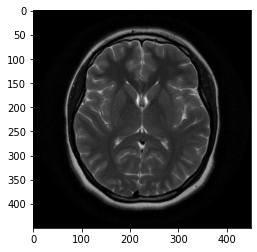

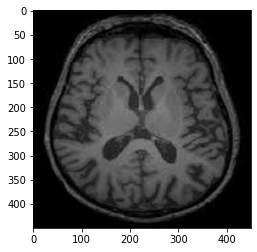

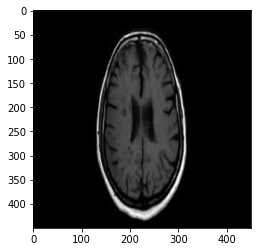

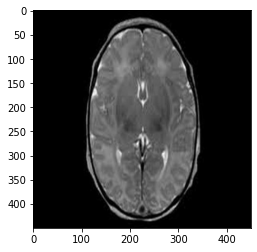

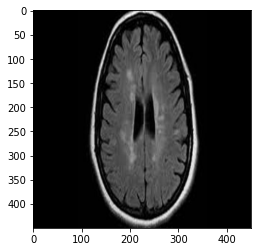

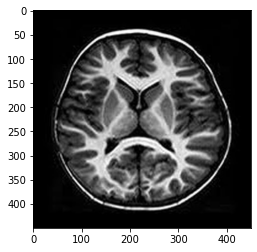

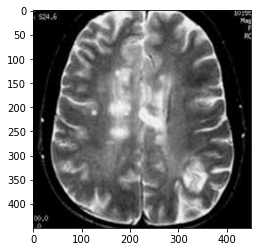

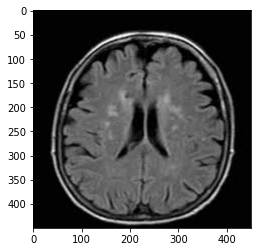

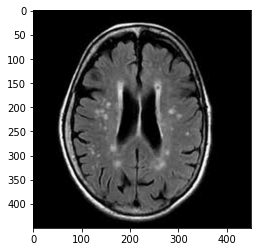

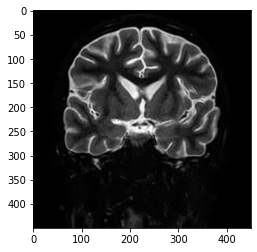

<Figure size 432x288 with 0 Axes>

In [11]:
j = 0
for i in arr:
  if j < 10:
    image = cv2.imread(i)
    plt.imshow(image)
    plt.figure()
  j += 1

In [12]:
j = 0

for i in arr:
  image = cv2.imread(i)
  
  # Grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  mask = np.zeros_like(gray)
  ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  cv2.drawContours(gray,contours,-1,(0,255,0),2)

  # print(contours)
  # raise
  # plt.imshow(gray)
  # plt.plot(contours[0][:,0,0],contours[0][:,0,1], c="r")

  cv2.fillPoly(mask, pts=contours, color=(255,255,255))
  gray[mask==0] = 0 

  # this is your data
  img = np.expand_dims(gray, axis=2)
  cv2.imwrite(i, img)
  # plt.imshow(gray)
  # print(gray)
  # plt.imshow(mask, alpha=.5)
  # plt.figure()


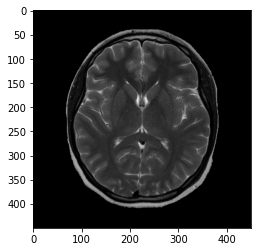

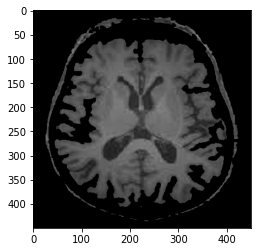

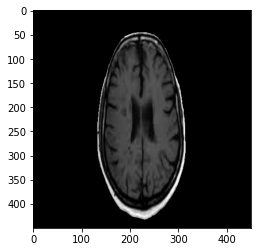

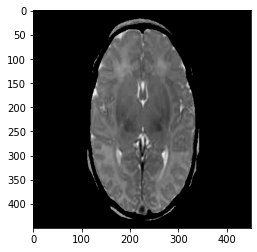

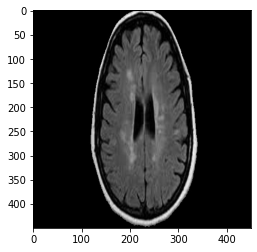

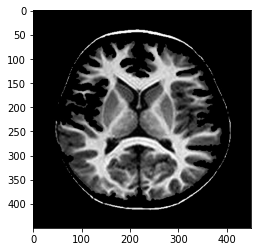

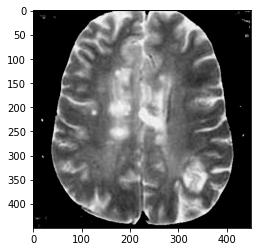

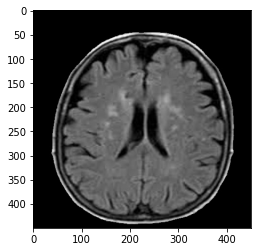

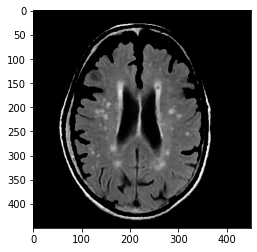

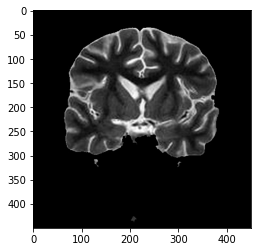

<Figure size 432x288 with 0 Axes>

In [13]:
j = 0
for i in arr:
  if j < 10:
    image = cv2.imread(i)
    plt.imshow(image)
    plt.figure()
  j += 1

In [14]:
image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(target_height, target_width),
    directory=all_data_dir,
    batch_size=128,
    image_data_generator=None)

Found 1009 images belonging to 2 classes.


## Splitting Data

In [15]:
split_size = .2
batch_size = np.round(image_iterator.n * split_size)
print(batch_size)

202.0


In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  all_data_dir,
  validation_split=split_size,
  subset="training",
  seed=123,
  image_size=(target_height, target_width),
  batch_size=batch_size
  )

Found 1009 files belonging to 2 classes.
Using 808 files for training.


In [17]:
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_labels.size

808

In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  all_data_dir,
  validation_split=split_size,
  subset="validation",
  seed=123,
  image_size=(target_height, target_width),
  batch_size=batch_size)

Found 1009 files belonging to 2 classes.
Using 201 files for validation.


In [19]:
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_labels.size

201

In [20]:
val_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1], dtype=int32)

In [21]:
class_names = train_ds.class_names
print('train class names =', class_names)
class_names = val_ds.class_names
print('val class names =', class_names)

train class names = ['no', 'yes']
val class names = ['no', 'yes']


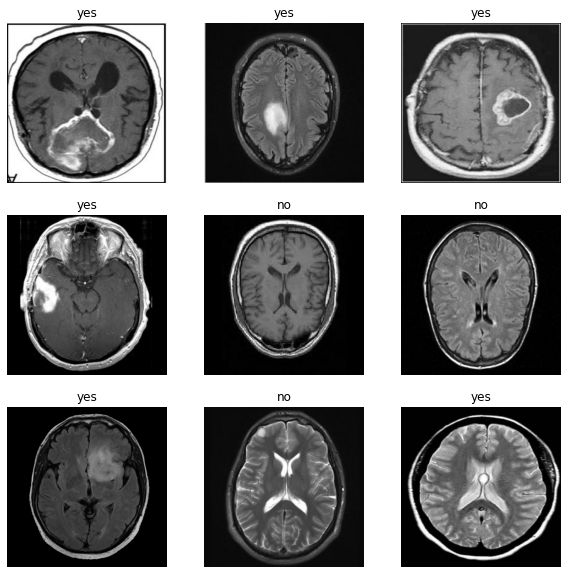

In [22]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  img = image_batch[i].numpy()
  plt.imshow(img.astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

## Build And Train Model

In [23]:
num_classes = 1

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(target_height, target_width, 3)),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 450, 450, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 450, 450, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 225, 225, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 225, 225, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0

In [25]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience= 20)

In [26]:
epochs=100

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=early_stop
)

Epoch 1/100
4/4 [==============================] - 21s 1s/step - loss: 4.4662 - accuracy: 0.5149 - val_loss: 2.9910 - val_accuracy: 0.4129
Epoch 2/100
4/4 [==============================] - 3s 721ms/step - loss: 1.3677 - accuracy: 0.5755 - val_loss: 0.6148 - val_accuracy: 0.7562
Epoch 3/100
4/4 [==============================] - 3s 714ms/step - loss: 0.5526 - accuracy: 0.7587 - val_loss: 0.5018 - val_accuracy: 0.7711
Epoch 4/100
4/4 [==============================] - 3s 716ms/step - loss: 0.4887 - accuracy: 0.7933 - val_loss: 0.4655 - val_accuracy: 0.8010
Epoch 5/100
4/4 [==============================] - 3s 715ms/step - loss: 0.4354 - accuracy: 0.8057 - val_loss: 0.4451 - val_accuracy: 0.8259
Epoch 6/100
4/4 [==============================] - 3s 712ms/step - loss: 0.3774 - accuracy: 0.8181 - val_loss: 0.3988 - val_accuracy: 0.8507
Epoch 7/100
4/4 [==============================] - 3s 713ms/step - loss: 0.3165 - accuracy: 0.8564 - val_loss: 0.3775 - val_accuracy: 0.8706
Epoch 8/100
4/4

## Checking Model Accuracy

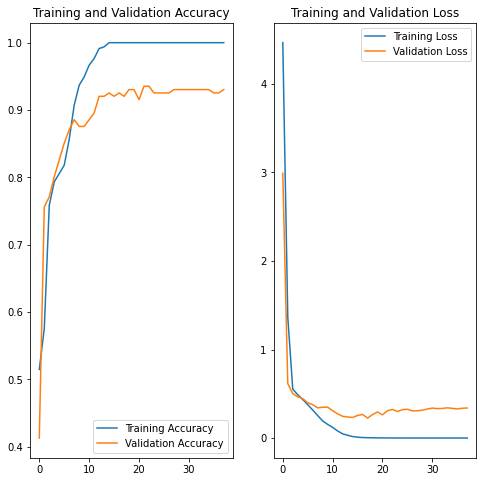

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
model.evaluate(val_ds)

1/1 [==============================] - 1s 522ms/step - loss: 0.3394 - accuracy: 0.9303


[0.3394280672073364, 0.93034827709198]

## Predictions

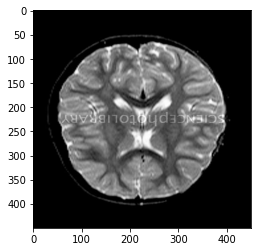

Prediction: NO TUMOR DETECTED
Certainty: NO TUMOR PRESENT


In [29]:
image_batch, label_batch = next(iter(val_ds))

num = random.randint(0, len(image_batch)-1)
plt.imshow(image_batch[num].numpy().astype('uint8'))
plt.show()
predictions = model.predict(image_batch)
rounded_predictions = abs(np.round(predictions + .25))
# print(predictions)
# print(rounded_predictions)
#rounded_labels = np.argmax(label_batch)
# print(label_batch)

if int(rounded_predictions[num][0]) is int(0):
  print('Prediction: NO TUMOR DETECTED')
else:
  print(('Prediction: TUMOR DETECTED'))

if int(label_batch[num].numpy()) is int(0):
  print('Certainty: NO TUMOR PRESENT')
else:
  print('Certainty: TUMOR PRESENT')


In [30]:
print('\nclassification report:')
print(classification_report(label_batch, rounded_predictions))


classification report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        83
           1       0.91      0.98      0.95       118

    accuracy                           0.94       201
   macro avg       0.94      0.93      0.93       201
weighted avg       0.94      0.94      0.93       201



confusion matrix:


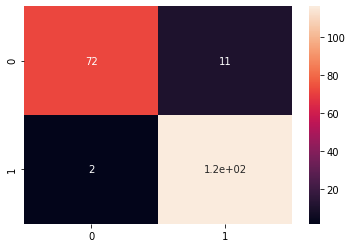

In [31]:
print('confusion matrix:')
cm = confusion_matrix(label_batch, rounded_predictions)
sns.heatmap(cm, xticklabels=[0, 1], yticklabels=[0,1], annot=True)